Hoffman et al. 2002 model of NFkB signalling. 

The first cell sets up the Julia packages we want, and you can select a results folder.

In [400]:
using Pkg #allows us to equip more packages
# Pkg.add("DifferentialEquations") #this package can solve a model
# Pkg.add("Plots") #this package can make graphs
using DifferentialEquations, Plots#, Dates, CSV, Dates, DataFrames, JLD2
#In Julia you must type "using <packagename>" to use an installed package
# cd("C:/Users/bsms1ab2/Results") #or change to your own results folder

The next cell contains all the information about the model.

Note that we need to define all the parameters, equations, and state which species comes in what order.




In [401]:
function hoffmanprac(du,u,p,t)
    #% Set Rate Parameters
    #NB Parameters are defined here, but overwritten by the parameter altering section below.
    #% Association 
    a1  = 1.35;     #IKK-IkBa association 
    a2  = 0.36;     #IKK-IkBb association
    a3  = 0.54;     #IKK-IkBe association
    a4  = 30;       #IkBa-NFkB association
    a5  = 30;       #IkBb-NFkB association
    a6  = 30;       #IkBe-NFkB association
    a7  = 11.1;     #IKK-IkBaNFkB association
    a8  = 2.88;     #IKK-IkBbNFkB association
    a9  = 4.2;      #IKK-IkBeNFkB association
    #% Dissociation
    d1  = 0.075;    #IKK-IkBa dissociation
    d2  = 0.105;    #IKK-IkBb dissociation
    d3  = 0.105;    #IKK-IkBe dissociation
    d4  = 0.03;     #IkBa-NFkB dissociation
    d5  = 0.03;     #IkBb-NFkB dissociation
    d6  = 0.03;     #IkBe-NFkB dissociation
    #% IKK-mediated IkB deg
    r1  = 0.2442;   #IKK-IkBa catalysis
    r2  = 0.09;     #IKK-IkBe catalysis
    r3  = 0.132;    #IKK-IkBaNFkB catalysis
    r4  = 1.221;    #IKK-IkBbNFkB catalysis
    r5  = 0.45;     #IKK-IkBeNFkB catalysis
    r6  = 0.66;

    tr1 = 0.2448;   # % IkB translation
    tr2 = 0.99;     # % Inducible IkBa txn #transcription #mRNA synthesis
    tr3 = 0.0168;   # % IkB mRNA deg

    deg1 = 0.0067;  #% Constitutive free IkB deg
    deg4 = 0.0014;  #% Constitutive bound IkB deg #IkB bound to NFkB

    k1  = 5.4;      #% NFkB Nuclear Import
    k01 = 0.0048;   #% NFkB Nuclear Export
    k2  = 0.8294;   #% IkBa:NFkB Nuclear Export
    k2_2= 0.5 * k2; #% IkBe/b:NFkB Nuclear Export
    tp1 = 0.018;    #% IkBa Nuclear Import
    tp2 = 0.012;    #% IkBa Nuclear Export

    tr2a= 9.2137e-5;#% IkBa Constitutive txn #transcription #mRNA synthesis
    tr2b= 1.0701e-5;#IkBb constitutive mRNA synthesis
    tr2e= 7.644e-6; #IkBe constitutive mRNA synthesis

    h   = 2; #% Hill Coefficient for Inducible IkBa txn

    k02 = 0.0072; #%IKK Degradation Rate
    fr_mod  = 0;
        if PHASE == 2
            if t < PULSE_LENGTH
                fr_mod  = -0.5 / ((1+t)^2);
#                 fr_mod = -0.05*((1+t)^2);
            else
                k02     = 0.18;
            end
        end
    
    #Altering parameters:
    param, modifier = p
    inputparams = [1.35, 0.36, 0.54, 30.0, 30.0, 30.0, 11.1, 2.88, 4.2, 0.075, 0.105, 0.105, 0.03, 0.03, 0.03, 0.2442, 0.09, 0.132, 1.221, 0.45, 0.66, 0.2448, 0.99, 0.0168, 0.0067, 0.0014, 5.4, 0.0048, 0.8294, 0.4147, 0.018, 0.012, 9.2137e-5, 1.0701e-5, 7.644e-6, 2.0, 0.0072]
    inputparams[param] =  (inputparams[param]*modifier)
    a1,a2,a3,a4,a5,a6,a7,a8,a9,d1,d2,d3,d4,d5,d6,r1,r2,r3,r4,r5,r6,tr1,tr2,tr3,deg1,deg4,k1,k01,k2,k2_2,tp1,tp2,tr2a,tr2b,tr2e,h,k02= inputparams

    #defining molecules
    NFkB         = u[1];
    NFkBn        = u[2];
    IkBa         = u[3];
    IkBb         = u[4];
    IkBe         = u[5];
    IkBat        = u[6];
    IkBan        = u[7];
    IkBaNFkBn    = u[8];
    IkBbt        = u[9];
    IkBbn        = u[10];
    IkBbNFkBn    = u[11];
    IkBet        = u[12];
    IkBen        = u[13];
    IkBeNFkBn    = u[14];
    IKK          = u[15];
    IKKIkBa      = u[16];
    IKKIkBb      = u[17];
    IKKIkBe      = u[18];
    IkBaNFkB     = u[19];
    IkBbNFkB     = u[20];
    IkBeNFkB     = u[21];
    IKKIkBaNFkB  = u[22];
    IKKIkBbNFkB  = u[23];
    IKKIkBeNFkB  = u[24];
    FR           = u[25];
    #
    du[1] = -a4 * IkBa * NFkB + d4 * IkBaNFkB -a5 * IkBb * NFkB + d5 * IkBbNFkB -a6 * IkBe * NFkB + d6 * IkBeNFkB -a4 * IKKIkBa * NFkB + (r4 + d4) * IKKIkBaNFkB -a5 * IKKIkBb * NFkB + (r5 + d5) * IKKIkBbNFkB -a6 * IKKIkBe * NFkB + (r6 + d6) * IKKIkBeNFkB +deg4 * IkBaNFkB+ deg4 * IkBbNFkB+ deg4 * IkBeNFkB -k1 * NFkB+ k01 * NFkBn;
    du[2] = k1 * NFkB - a4 * IkBan * NFkBn + d4 * IkBaNFkBn - a5 * IkBbn * NFkBn + d5 * IkBbNFkBn - a6 * IkBen * NFkBn + d6 * IkBeNFkBn - k01 * NFkBn;
    du[3] = -a1 * IKK * IkBa + d1 * IKKIkBa - a4 * IkBa * NFkB + d4 * IkBaNFkB + tr1 * IkBat - deg1 * IkBa - tp1 * IkBa + tp2 * IkBan;
    du[4] = -a2 * IKK * IkBb + d2 * IKKIkBb - a5 * IkBb * NFkB + d5 * IkBbNFkB + tr1 * IkBbt - deg1 * IkBb - tp1 * IkBb + tp2 * IkBbn;
    du[5] = -a3 * IKK * IkBe + d3 * IKKIkBe - a6 * IkBe * NFkB + d6 * IkBeNFkB + tr1 * IkBet - deg1 * IkBe - tp1 * IkBe + tp2 * IkBen;
    du[6] = tr2a + tr2 * (NFkBn^h) - tr3 * IkBat;
    du[7] = tp1 * IkBa - tp2 * IkBan - a4 * IkBan * NFkBn + d4 * IkBaNFkBn;
    du[8] = a4 * IkBan * NFkBn - d4 * IkBaNFkBn - k2 * IkBaNFkBn
    du[9] = tr2b - tr3 * IkBbt;
    du[10] = tp1 * IkBb - tp2 * IkBbn - a5 * IkBbn * NFkBn + d5 * IkBbNFkBn;
    du[11] = a5 * IkBbn * NFkBn - d5 * IkBbNFkBn - k2_2 * FR * IkBbNFkBn;
    du[12] = tr2e - tr3 * IkBet;
    du[13] = tp1 * IkBe - tp2 * IkBen - a6 * IkBen * NFkBn + d6 * IkBeNFkBn;
    du[14] = a6 * IkBen * NFkBn - d6 * IkBeNFkBn - k2_2 * IkBeNFkBn;
    du[15] = -k02 * IKK - a1 * IKK * IkBa + (d1 + r1) * IKKIkBa - a2 * IKK * IkBb + (d2 + r2) * IKKIkBb - a3 * IKK * IkBe + (d3 + r3) * IKKIkBe - a7 * IKK * IkBaNFkB + (d1 + r4) * IKKIkBaNFkB - a8 * IKK * IkBbNFkB + (d2 + r5) * IKKIkBbNFkB - a9 * IKK * IkBeNFkB + (d3 + r6) * IKKIkBeNFkB;
    du[16] = a1 * IKK * IkBa - (d1 + r1) * IKKIkBa - a4 * IKKIkBa * NFkB + d4 * IKKIkBaNFkB;
    du[17] = a2 * IKK * IkBb - (d2 + r2) * IKKIkBb - a5 * IKKIkBb * NFkB + d5 * IKKIkBbNFkB;
    du[18] = a3 * IKK * IkBe - (d3 + r3) * IKKIkBe - a6 * IKKIkBe * NFkB + d6 * IKKIkBeNFkB;
    du[19] = a4 * IkBa * NFkB - d4 * IkBaNFkB - a7 * IKK * IkBaNFkB + d1 * IKKIkBaNFkB + k2 * IkBaNFkBn - deg4 * IkBaNFkB;
    du[20] = a5 * IkBb * NFkB - d5 * IkBbNFkB - a8 * IKK * IkBbNFkB + d2 * IKKIkBbNFkB + k2_2 * FR * IkBbNFkBn - deg4 * IkBbNFkB;
    du[21] = a6 * IkBe * NFkB - d6 * IkBeNFkB - a9 * IKK * IkBeNFkB + d3 * IKKIkBeNFkB + k2_2 * IkBeNFkBn - deg4 * IkBeNFkB;
    du[22] = a7 * IKK * IkBaNFkB + a4 * IKKIkBa * NFkB - (d1 + d4 + r4) * IKKIkBaNFkB;
    du[23] = a8 * IKK * IkBbNFkB + a5 * IKKIkBb * NFkB - (d2 + d5 + r5) * IKKIkBbNFkB;
    du[24] = a9 * IKK * IkBeNFkB + a6 * IKKIkBe * NFkB - (d3 + d6 + r6) * IKKIkBeNFkB;
    du[25] = fr_mod;    
end

hoffmanprac (generic function with 1 method)

Below is purely for graph plotting functions. You need only notice line 1 and 14, which shows what input is expected.

In [402]:
function plotNFkBn_IkBbNFkB(sollist,graphtitle="Nuclear NFkB & IkBbNFkB",labelz=range(1,100,step=1)) #this function only returns our "output", the summed nuclear NFkB
    plot_array = Any[]
    plotVar=plot()
    for j in 1:length(sollist)
        plot!(plotVar,sollist[j].t,sollist[j][2,:]+sollist[j][11,:],title=graphtitle,label=labelz[j])
    end
    push!(plot_array,plotVar) # make a plot and add it to the plot_array
#     plot(plotVar,sol.t,1000*(sol[2,:]+sol[11,:]),title="Nuclear NFkB & IkBbNFkB")
    return plot(plot_array...)
end

####for plotting all species####

function plotsols(sollist,syms,labelnames) #list of sols, list of all species' names, list of labels of multiple conditions
#species'names must be in same order as written in model
    plot_array = Any[]
    for i in 1:length(syms)
        plotVar=plot()
        for j in 1:length(sollist)
            plot!(plotVar,sollist[j].t,sollist[j][i,:],label=labelnames[j])
        end
        push!(plot_array,plotVar) # make a plot and add it to the plot_array
    end
    push!(plot_array,plotNFkBn_IkBbNFkB(sollist,nothing,labelnames))
    titleArray=reshape(syms, 1, length(syms))
    return plot(plot_array...,layout=length(plot_array),title=titleArray,size=[1250,800])
end

plotsols (generic function with 2 methods)

This Cell is the simulation cell! Hit shift+enter to become a schmientist.

We set up experiment conditions on line 11, then execute on line 12. All the solution output is stored in the "sol" object.

The starting levels for our simulation is uequilibrium; which is a steady-state that we pre-calculated simply by doing a very long simulation (t=10000) without any stimulation (PHASE=1), with u0 as the starting point.

In [403]:
#Define parameters for problem
modifier=1 #modifier = 1.0 is the wildtype scenario.
params=[24]
tspan = (0.0, 360.0)
PHASE = 2
PULSE_LENGTH = 60
u0 = [0.1, 0.001, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
uequilibrium = [0.000258127017718267, 0.000226467266688231, 0.183290800140255, 0.0212942661994315, 0.0152110429705970, 0.00548736753123294, 0.177790657130346, 0.00140553051458945, 0.000636964285714259, 0.0209044179333966, 0.000319372591123225, 0.000454999999999981, 0.0149325643101368, 0.000228136070137766, 0.1,0,0,0, 0.0823285431138940, 0.00946950853897954, 0.00676431392130725,0,0,0,0.5] #taken from end of a tspan=(0.0,10000.0), and changed 25 (fr_mod) to 0.5

#Defining and solving problem
prob_hoffman = ODEProblem(hoffmanprac,uequilibrium,tspan,[params,modifier])
sol=solve(prob_hoffman)

#Solution naming and saving, if you want
# outputname=string(Dates.now())[1:19]
# outputname=replace(outputname,":" => "_")
# CSV.write(outputname*".csv",DataFrame(sol))     #slightly tricky to use, would recommend JLD2 sol object.
# JLD2.@save outputname*".jld2" sol               #to load, use julia> JLD2.@load <.jld2 file> sol

retcode: Success
Interpolation: automatic order switching interpolation
t: 194-element Array{Float64,1}:
   0.0
   0.035878270482186995
   0.07380513336041286
   0.12573590993919917
   0.18626487499161298
   0.26335969419796423
   0.35789778460079136
   0.47976492695874084
   0.6323927810150166
   0.8170504359277238
   1.0490634071012794
   1.3550164728436855
   1.7363350405625262
   ⋮
 291.6049396853569
 297.9765923406105
 304.2262981430426
 310.31315625370445
 316.38502294628154
 322.62818857232753
 329.3524255123052
 336.8692391171974
 344.50879278807855
 351.704181853603
 358.53123388425854
 360.0
u: 194-element Array{Array{Float64,1},1}:
 [0.000258127017718267, 0.000226467266688231, 0.183290800140255, 0.0212942661994315, 0.015211042970597, 0.00548736753123294, 0.177790657130346, 0.00140553051458945, 0.000636964285714259, 0.0209044179333966  …  0.0, 0.0, 0.0, 0.082328543113894, 0.00946950853897954, 0.00676431392130725, 0.0, 0.0, 0.0, 0.5]
 [0.0003195111224439567, 0.0002303834829211

The output isn't human-friendly to look at, but you can see a list of timepoints t, and a list of protein levels u.

Let's generate a graph using that plot function from above:

subplotlist=[]
for i =1:25
    plotspecie(sol,i)
    push!(subplotlist,current())
end
plotNFkBn_IkBbNFkB(sol)
push!(subplotlist,current())
plot(subplotlist...,size=[1200,800],legend=false,linewidth=1,show=true)
#######

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\bsms9jt3\.julia\packages\PlotUtils\VgXdq\src\ticks.jl:294


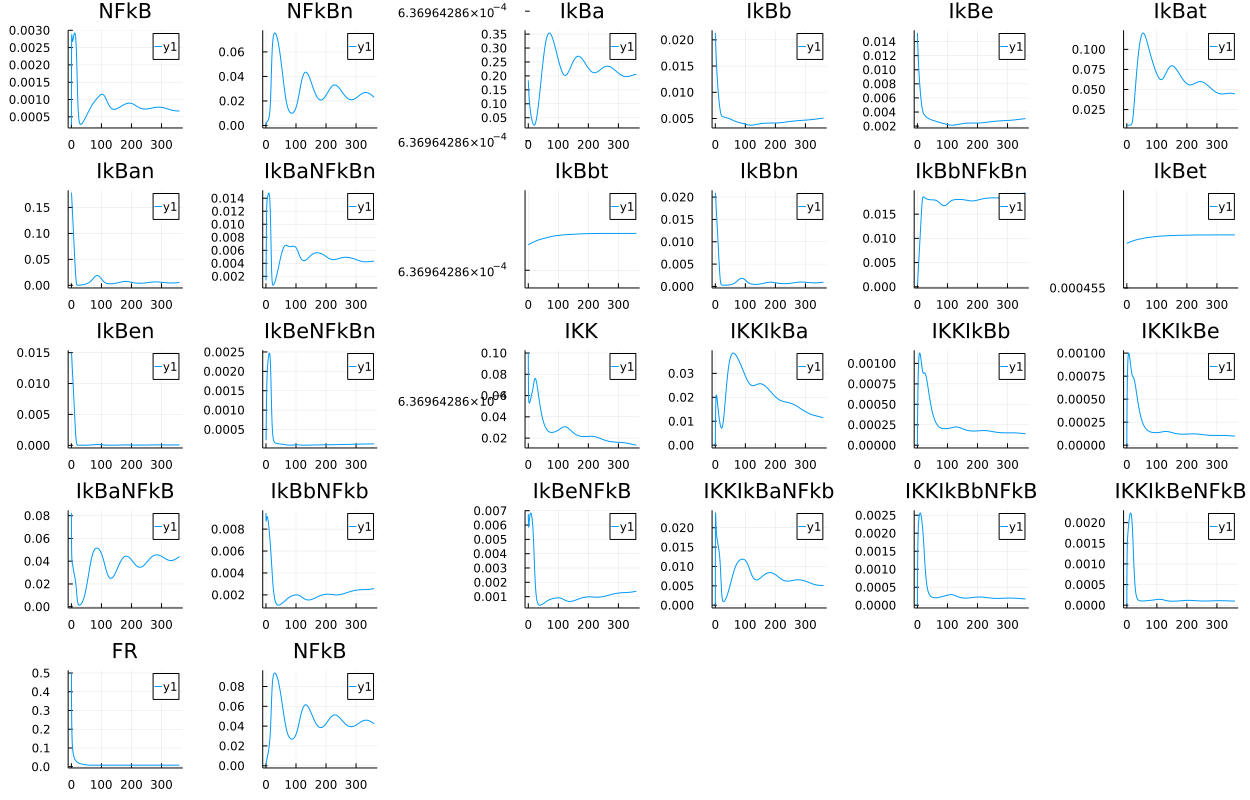

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\bsms9jt3\.julia\packages\PlotUtils\VgXdq\src\ticks.jl:294


In [404]:
#Plotting in a slightly quicker way
syms=["NFkB","NFkBn","IkBa","IkBb","IkBe","IkBat","IkBan","IkBaNFkBn","IkBbt","IkBbn","IkBbNFkBn","IkBet","IkBen","IkBeNFkBn","IKK","IKKIkBa","IKKIkBb","IKKIkBe","IkBaNFkB","IkBbNFkb","IkBeNFkB","IKKIkBaNFkb","IKKIkBbNFkB","IKKIkBeNFkB","FR"]
labelnames=["1" "2" "3"]
plotsols([sol],syms,["y1"])
# plot!(legend=:none, )

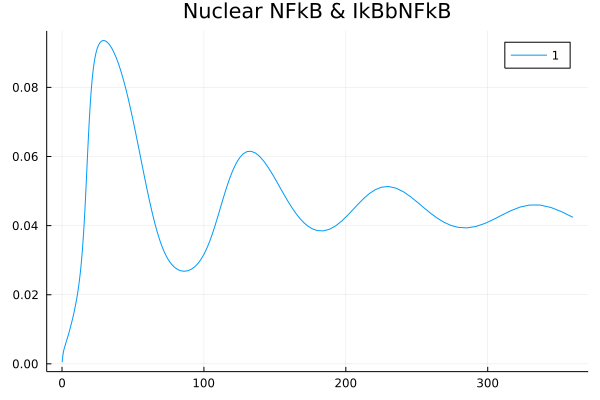

In [405]:
plotNFkBn_IkBbNFkB([sol]) ##this just adds the two species we consider to be "active NF-kappaB"

In [406]:
paramnames=["a1","a2","a3","a4","a5","a6","a7","a8","a9","d1","d2","d3","d4","d5","d6","r1","r2","r3","r4","r5","r6","tr1","tr2","tr3","deg1","deg4","k1","k01","k2","k2_2","tp1","tp2","tr2a","tr2b","tr2e","h","k02"];

In the cell below you can run paramnames[index] to check that you have the right index for the parameter you want to change!!

In [407]:
paramnames[37]

"k02"

We can do multiple simulation runs and plot them on the same graph.

Each time we go through the for loop, we change the multiplier for that parameter:

for i = [0.1, 0.5, 1, 2, 10] 

will set the parameter at a tenth, half, normal, double, and tenfold

It's best to include a 1 in that list so you can compare to the wildtype!!!

Set a Parameter: in line 6.



In [408]:
#We can plot multiple tests if we run them in a for loop
sollist=[]
for i = [0.1, 1]       #list of comma separated values, the parameter will be MULTIPLIED by
    #Define parameters for problem
    modifier=i
    params=[7]         #which param is this? Test by doing: paramnames[20]
    tspan = (0.0, 360.0)
    PHASE = 2
    PULSE_LENGTH=360    #the whole experiment
    u0 = [0.1, 0.001, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
    uequilibrium = [0.000258127017718267, 0.000226467266688231, 0.183290800140255, 0.0212942661994315, 0.0152110429705970, 0.00548736753123294, 0.177790657130346, 0.00140553051458945, 0.000636964285714259, 0.0209044179333966, 0.000319372591123225, 0.000454999999999981, 0.0149325643101368, 0.000228136070137766, 0.1,0,0,0, 0.0823285431138940, 0.00946950853897954, 0.00676431392130725,0,0,0,0.5] #taken from end of a tspan=(0.0,10000.0), and changed 25 (fr_mod) to 0.5
    #Defining and solving problem
    prob_hoffman = ODEProblem(hoffmanprac,uequilibrium,tspan,[params,i])
    sol=solve(prob_hoffman)
    push!(sollist, sol)
end

Bear in mind 20 experiments will take ~20x as long to run. 

The next cell will plot the modelled species in a graph.

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\bsms9jt3\.julia\packages\PlotUtils\VgXdq\src\ticks.jl:294


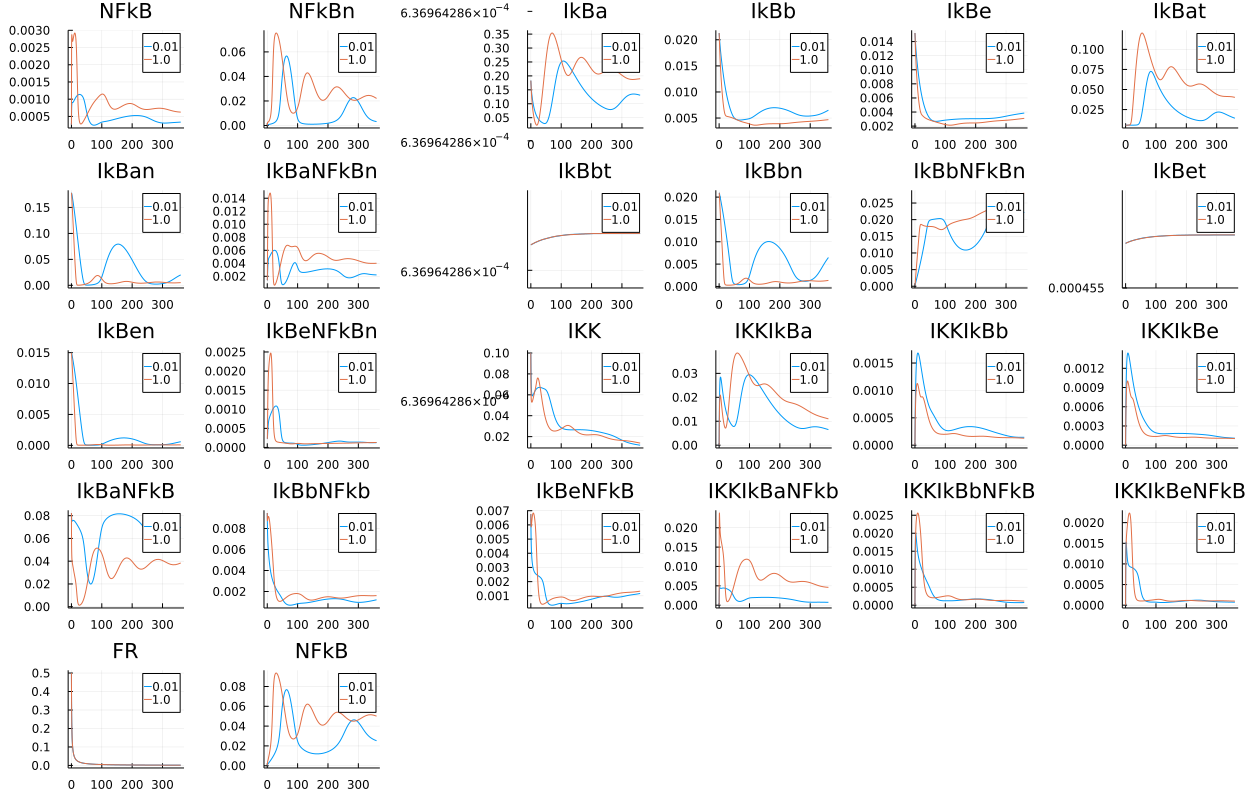

┌ Warning: No strict ticks found
└ @ PlotUtils C:\Users\bsms9jt3\.julia\packages\PlotUtils\VgXdq\src\ticks.jl:294


In [409]:
plotsols(sollist,syms,[0.01,1])
# plot!(legend=:none)

and this last cell will plot all the nuclear NFkB, which we consider active:

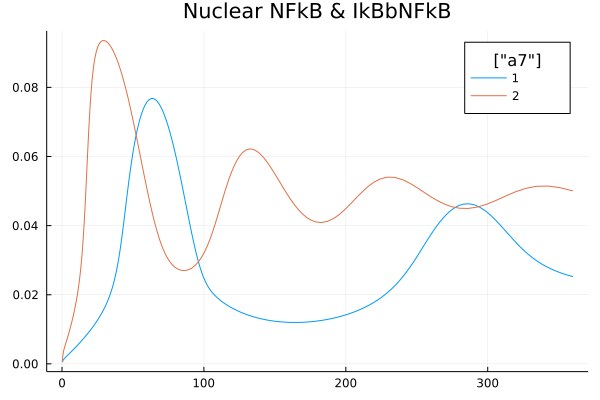

In [410]:
plotNFkBn_IkBbNFkB(sollist)
plot!(legendtitle=paramnames[params],labelname=[0.01, 1])
# plot!(legend=:none,thickness_scaling=1.5)

In [411]:
# savefig("ikbalpha example")

In [412]:
pwd() #will show you where the picture saved.

"C:\\Users\\bsms9jt3\\OneDrive - University of Brighton\\Documents\\Julia\\Results"

Generated your mutant? Now we'll try to restore it.

Copy and paste the entire model and change its name to something like "mutantmodel"

Fill out the line: 

 inputparams[blank1] = inputparams[blank1] * blank2

...and place that after line64 in the model definition cell. Change the name of the model to something else before you hit enter!

In [413]:
#inputparams[mutantparam] = inputparams[mutantparam] * number

Make sure to update the model name in line 12 below:

Pick a sensible range for "ilist" and run the parameter scan on the MUTANT model you created.

Out of all the resulting graphs, which trajectory looks most similar to wildtype? 

What parameter did you modify, and by how much?

Hint: you can click on the white space left of the output to expand.

In [414]:
eachparameter=[]
ilist=[0.1,0.5,1,2,10]
for j in 1:37
    sollist=[]
    for i in ilist
        modifier=i
        params=[j]
        tspan = (0.0, 360.0)
        PHASE = 2
        PULSE_LENGTH=360
        uequilibrium = [0.000258127017718267, 0.000226467266688231, 0.183290800140255, 0.0212942661994315, 0.0152110429705970, 0.00548736753123294, 0.177790657130346, 0.00140553051458945, 0.000636964285714259, 0.0209044179333966, 0.000319372591123225, 0.000454999999999981, 0.0149325643101368, 0.000228136070137766, 0.1,0,0,0, 0.0823285431138940, 0.00946950853897954, 0.00676431392130725,0,0,0,0.5]
        prob_hoffman = ODEProblem(NEW___MUTANT__MODEL_NAME,uequilibrium,tspan,[params,i])
#         prob_hoffman = ODEProblem(hoffmanprac,uequilibrium,tspan,[params,i])
        sol=solve(prob_hoffman)
        push!(sollist, sol)
    end
    push!(eachparameter,plotNFkBn_IkBbNFkB(sollist,paramnames[j],ilist))
end

LoadError: [91mUndefVarError: NEW___MUTANT__MODEL_NAME not defined[39m

In [415]:
for n in eachparameter
    display(n)
end